# Chronos Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import ChronosModel
from samay.dataset import ChronosDataset
# from tsfmproject.utils import load_args

# arg_path = "../config/timesfm.json"
# args = load_args(arg_path)
repo = "amazon/chronos-t5-small"
chronos_model = ChronosModel(repo=repo)


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Loading Chronos model from Huggingface repository


/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Define the datasets

In [3]:
train_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=8)
val_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=8)

## Visualize the zero-shot forecasting

/nethome/sli999/Samay/src/samay/model.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


(465, 7, 512)


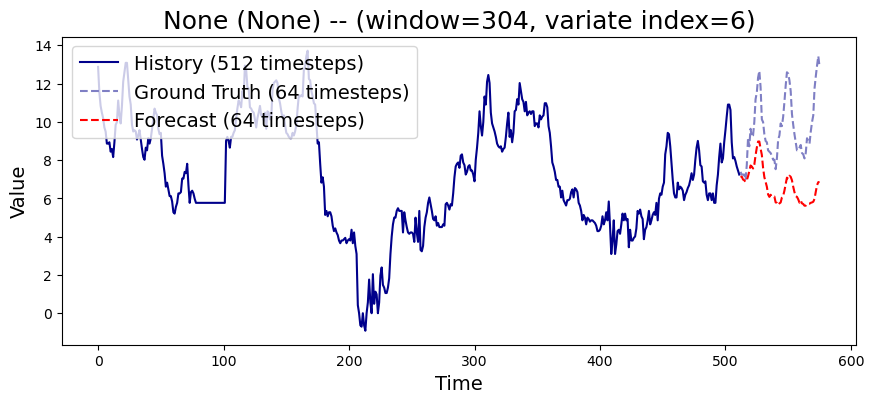

In [4]:
chronos_model.plot(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])

## Evaluate the zero-shot Chronos Model

In [ ]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9], metric_only=True)
print(metrics)

/nethome/sli999/TSFMProject/src/tsfmproject/model.py:278: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


{'mse': 11.583873753548028, 'mae': 1.6239146541801652, 'mase': 0.7193445694024982, 'mape': 1089.3897239767316, 'rmse': 3.4035090353263393, 'nrmse': 0.07411982815676035, 'smape': 0.4066715574568436, 'msis': 0.053433793432786814, 'nd': 0.43582558694727197, 'mwsq': 0.20025008741496833, 'crps': 59.84648807962155}


## Finetune Chronos Model on the ETT dataset

In [6]:
chronos_model.finetune(train_dataset)

/nethome/sli999/TSFMProject/src/tsfmproject/models/chronosforecasting/chronos/chronos.py:182: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  torch.bucketize(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 0, Loss: 3.873541189175026
Epoch 1, Loss: 3.8479938911548355
Epoch 2, Loss: 3.807684043271042
Epoch 3, Loss: 3.775016161538638
Epoch 4, Loss: 3.7431155335351676


## Evaluate the Finetuned Chronos Model

In [ ]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9], metric_only=True)
print(metrics)

{'mse': 10.591684153912842, 'mae': 1.5688448066909197, 'mase': 0.6949503097489871, 'mape': 1019.6895045377311, 'rmse': 3.254486772735886, 'nrmse': 0.07087449976770939, 'smape': 0.4019224681779536, 'msis': 0.05103026587288774, 'nd': 0.42104596257272997, 'mwsq': 0.5311213710478336, 'crps': 55.6324975659118}
